# Libraries and versions

In [11]:
python_version = !python -V #version 3.7.9
import pandas as pd #version 1.2.4
import numpy as np #version 1.20.1
import seaborn as sns #version 0.11.0
import matplotlib as plt #version 3.3.3
from random import randint

#Modelo
from sklearn.metrics import mean_squared_log_error, r2_score


In [12]:
print(f'Python version - {python_version[0][7:]}')
print(f'Pandas version - {pd.__version__}')
print(f'Numpy version - {np.__version__}')
print(f'Seaborn version - {sns.__version__}')
print(f'Matplotlib version - {plt.__version__}')

Python version - 3.7.9
Pandas version - 1.2.4
Numpy version - 1.20.1
Seaborn version - 0.11.0
Matplotlib version - 3.3.3


# Configurations

## Pandas

In [13]:
#apresentará 500 colunas e linhas
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 20)

## Seaborn

In [109]:
sns.set_palette('inferno')
sns.set_style('darkgrid')

def configuration(graphic_object, title=None, xlabel=None, ylabel=None, colors='black'):
    graphic_object.figure.set_size_inches(15,4)
    graphic_object.set_title(title, color=colors, fontsize=16)
    graphic_object.set_xlabel(xlabel, color=colors, fontsize=14)
    graphic_object.set_ylabel(ylabel, color=colors, fontsize=14)
    graphic_object = graphic_object

## Warnings

In [15]:
import warnings
warnings.filterwarnings("ignore")

## Base

In [16]:
bvsp = pd.read_csv('bvsp_modelado_original.csv')
bvsp.head()

,data,abertura,alta,baixa,fechamento,var_abertura,media_movel_180,media_movel_240,media_movel_360,media_movel_480
0,1995-02-27,3217.399902,3345.800049,3184.399902,3270.899902,0.000000,4404.944448,3785.654587,2719.633892,2057.587711
1,1995-02-28,3217.399902,3345.800049,3184.399902,3270.899902,0.000000,4404.830560,3792.938337,2728.090837,2064.238961
2,1995-03-01,3217.399902,3345.800049,3184.399902,3270.899902,0.000000,4404.943892,3800.340836,2736.526114,2070.890836
3,1995-03-02,3270.899902,3270.899902,2970.199951,2989.100098,53.500000,4405.345558,3807.966252,2745.099169,2077.654585
4,1995-03-03,2989.100098,3018.100098,2841.699951,2988.000000,-281.799804,4404.507225,3814.417502,2752.882781,2083.832502


### Informações

In [17]:
bvsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   data             6637 non-null   object 
 1   abertura         6637 non-null   float64
 2   alta             6637 non-null   float64
 3   baixa            6637 non-null   float64
 4   fechamento       6637 non-null   float64
 5   var_abertura     6637 non-null   float64
 6   media_movel_180  6637 non-null   float64
 7   media_movel_240  6637 non-null   float64
 8   media_movel_360  6637 non-null   float64
 9   media_movel_480  6637 non-null   float64
dtypes: float64(9), object(1)
memory usage: 518.6+ KB


### Transformar dados

In [19]:
#transforma variável data em datetime
bvsp['data'] = pd.to_datetime(bvsp['data'])
bvsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             6637 non-null   datetime64[ns]
 1   abertura         6637 non-null   float64       
 2   alta             6637 non-null   float64       
 3   baixa            6637 non-null   float64       
 4   fechamento       6637 non-null   float64       
 5   var_abertura     6637 non-null   float64       
 6   media_movel_180  6637 non-null   float64       
 7   media_movel_240  6637 non-null   float64       
 8   media_movel_360  6637 non-null   float64       
 9   media_movel_480  6637 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 518.6 KB


In [21]:
#excluí colunas de lag, diff e estatística móvel
bvsp.drop(columns=['var_abertura', 'media_movel_180', 'media_movel_240', 'media_movel_360', 'media_movel_480'], inplace=True)
bvsp.columns

Index(['data', 'abertura', 'alta', 'baixa', 'fechamento'], dtype='object')

### Funções

In [92]:
# gerar os valoes aleatórios
def baseline_aleatorio(df, coluna_input, nome_coluna_output, var_max, var_min, seed=False):
    if seed == True:
        SEED = seed
        np.random.seed(SEED)
    else:
        pass
    lista_tmp = []
    for valor in df[coluna_input].values:
        num_aleatorio = np.random.randint(var_min, var_max)
        variacao = valor * num_aleatorio / 100
        previsao = valor + (variacao)
        lista_tmp.append(previsao)
    #cria nova coluna no dataframe
    df[nome_coluna_output] = lista_tmp
    return df

## Baseline

### Fechamento (-15% até 33%)

In [93]:
baseline_aleatorio(df=bvsp, coluna_input='fechamento', nome_coluna_output='baseline_fechamento', var_max=33, var_min=-15, seed=666)

,data,abertura,alta,baixa,fechamento,baseline_fechamento,baseline_alta,baseline_baixa
0,1995-02-27,3217.399902,3345.800049,3184.399902,3270.899902,3336.317900,3446.174050,2961.491909
1,1995-02-28,3217.399902,3345.800049,3184.399902,3270.899902,3826.952885,4382.998064,2643.051919
2,1995-03-01,3217.399902,3345.800049,3184.399902,3270.899902,3597.989892,3580.006052,2993.335908
3,1995-03-02,3270.899902,3270.899902,2970.199951,2989.100098,2959.209097,3597.989892,2584.073957
4,1995-03-03,2989.100098,3018.100098,2841.699951,2988.000000,2778.840000,3953.711128,2557.529956
...,...,...,...,...,...,...,...,...
6632,2021-05-10,122038.000000,122772.000000,121795.000000,121909.000000,108499.010000,160831.320000,103525.750000
6633,2021-05-11,121904.000000,122964.000000,120145.000000,122964.000000,118045.440000,162312.480000,103324.700000
6634,2021-05-12,122964.000000,122964.000000,119458.000000,119710.000000,158017.200000,131571.480000,107512.200000
6635,2021-05-13,119711.000000,121426.000000,119711.000000,120706.000000,123120.120000,127497.300000,113725.450000


### Alta (1% a 34%)

In [94]:
baseline_aleatorio(df=bvsp, coluna_input='alta', nome_coluna_output='baseline_alta', var_max=34, var_min=1, seed=333)

,data,abertura,alta,baixa,fechamento,baseline_fechamento,baseline_alta,baseline_baixa
0,1995-02-27,3217.399902,3345.800049,3184.399902,3270.899902,3336.317900,3479.632051,2961.491909
1,1995-02-28,3217.399902,3345.800049,3184.399902,3270.899902,3826.952885,3513.090051,2643.051919
2,1995-03-01,3217.399902,3345.800049,3184.399902,3270.899902,3597.989892,4182.250061,2993.335908
3,1995-03-02,3270.899902,3270.899902,2970.199951,2989.100098,2959.209097,3499.862895,2584.073957
4,1995-03-03,2989.100098,3018.100098,2841.699951,2988.000000,2778.840000,3138.824102,2557.529956
...,...,...,...,...,...,...,...,...
6632,2021-05-10,122038.000000,122772.000000,121795.000000,121909.000000,108499.010000,153465.000000,103525.750000
6633,2021-05-11,121904.000000,122964.000000,120145.000000,122964.000000,118045.440000,127882.560000,103324.700000
6634,2021-05-12,122964.000000,122964.000000,119458.000000,119710.000000,158017.200000,132801.120000,107512.200000
6635,2021-05-13,119711.000000,121426.000000,119711.000000,120706.000000,123120.120000,144496.940000,113725.450000


### Baixa (-19% a -1%)

In [95]:
baseline_aleatorio(df=bvsp, coluna_input='baixa', nome_coluna_output='baseline_baixa', var_max=-1, var_min=-19, seed=999)

,data,abertura,alta,baixa,fechamento,baseline_fechamento,baseline_alta,baseline_baixa
0,1995-02-27,3217.399902,3345.800049,3184.399902,3270.899902,3336.317900,3479.632051,3088.867905
1,1995-02-28,3217.399902,3345.800049,3184.399902,3270.899902,3826.952885,3513.090051,2674.895918
2,1995-03-01,3217.399902,3345.800049,3184.399902,3270.899902,3597.989892,4182.250061,3120.711904
3,1995-03-02,3270.899902,3270.899902,2970.199951,2989.100098,2959.209097,3499.862895,2702.881955
4,1995-03-03,2989.100098,3018.100098,2841.699951,2988.000000,2778.840000,3138.824102,2472.278957
...,...,...,...,...,...,...,...,...
6632,2021-05-10,122038.000000,122772.000000,121795.000000,121909.000000,108499.010000,153465.000000,105961.650000
6633,2021-05-11,121904.000000,122964.000000,120145.000000,122964.000000,118045.440000,127882.560000,110533.400000
6634,2021-05-12,122964.000000,122964.000000,119458.000000,119710.000000,158017.200000,132801.120000,117068.840000
6635,2021-05-13,119711.000000,121426.000000,119711.000000,120706.000000,123120.120000,144496.940000,114922.560000


### Gráfico Baseline

#### Fechamento

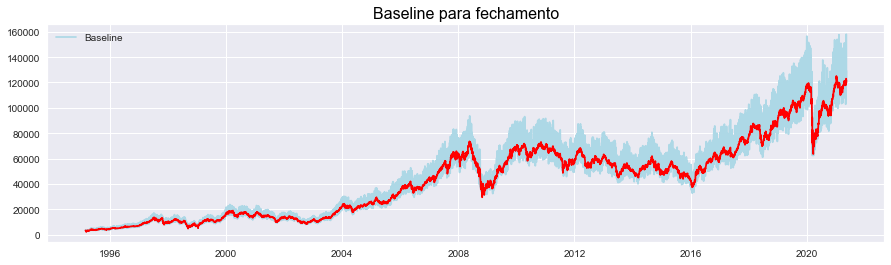

In [110]:
g4 = sns.lineplot(x=bvsp['data'], y=bvsp['baseline_fechamento'], color='lightblue', label='Baseline')
g4 = sns.lineplot(x=bvsp['data'], y=bvsp['fechamento'], color='red')
configuration(g4, title='Baseline para fechamento')

#### Baixa

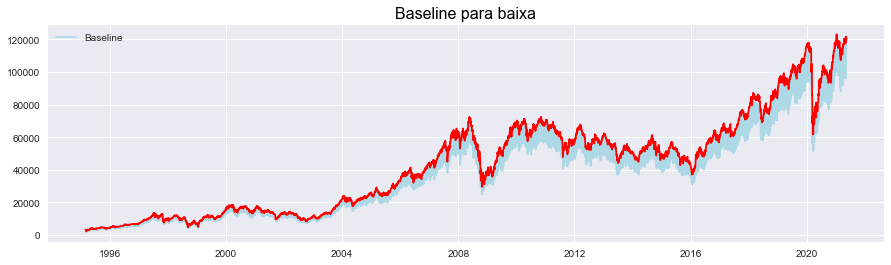

In [111]:
g4 = sns.lineplot(x=bvsp['data'], y=bvsp['baseline_baixa'], color='lightblue', label='Baseline')
g4 = sns.lineplot(x=bvsp['data'], y=bvsp['baixa'], color='red')
configuration(g4, title='Baseline para baixa')

#### Alta

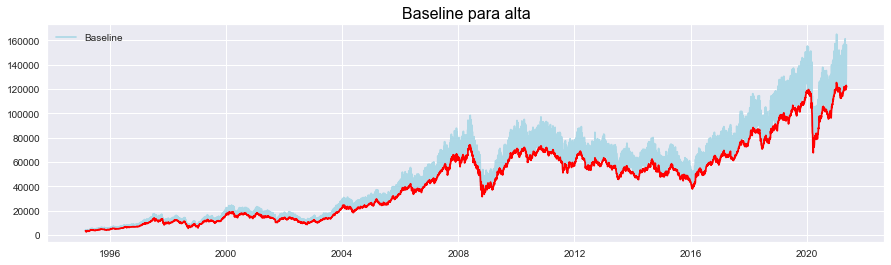

In [112]:
g4 = sns.lineplot(x=bvsp['data'], y=bvsp['baseline_alta'], color='lightblue', label='Baseline')
g4 = sns.lineplot(x=bvsp['data'], y=bvsp['alta'], color='red')
configuration(g4, title='Baseline para alta')

## Scores

### Base validação
Utilizarei o segundo semestre de 2020 até o final do período da base como dados de validação

In [115]:
base_validacao = bvsp.query('data >= "2020-06-01"')
base_validacao

,data,abertura,alta,baixa,fechamento,baseline_fechamento,baseline_alta,baseline_baixa
6401,2020-06-01,87395.0,89019.0,86837.0,88620.0,109888.80,106822.80,79890.04
6402,2020-06-02,88622.0,91046.0,88622.0,91046.0,101061.06,105613.36,73556.26
6403,2020-06-03,91048.0,93710.0,91048.0,93002.0,89281.92,116200.40,81032.72
6404,2020-06-04,92993.0,94132.0,92221.0,93829.0,102273.61,95073.32,81154.48
6405,2020-06-05,93839.0,97356.0,93839.0,94637.0,99368.85,122668.56,87270.27
...,...,...,...,...,...,...,...,...
6632,2021-05-10,122038.0,122772.0,121795.0,121909.0,108499.01,153465.00,105961.65
6633,2021-05-11,121904.0,122964.0,120145.0,122964.0,118045.44,127882.56,110533.40
6634,2021-05-12,122964.0,122964.0,119458.0,119710.0,158017.20,132801.12,117068.84
6635,2021-05-13,119711.0,121426.0,119711.0,120706.0,123120.12,144496.94,114922.56


#### Fechamento

In [116]:
y_fechamento = base_validacao['fechamento']
y_fechamento_previsto = base_validacao['baseline_fechamento']
r2_score(y_fechamento, y_fechamento_previsto)

-1.9432324461770238

### Baixa

In [117]:
y_baixa = base_validacao['baixa']
y_baixa_previsto = base_validacao['baseline_baixa']
r2_score(y_baixa, y_baixa_previsto)

-0.7542784259366757

### Alta

In [118]:
y_alta = base_validacao['alta']
y_alta_previsto = base_validacao['baseline_alta']
r2_score(y_alta, y_alta_previsto)

-4.001182093032419

## Conclusão

Utilizar as variações aleatórias do máximo e mínimo não criou um bom baseline

**Irei utilizar uma das estatísticas móveis com período menor 5 ou 10 dias**